In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir las ecuaciones diferenciales
def hiv_model(t, y, alpha1, alpha2, beta1, beta2, gamma):
    V, R, E = y
    dV_dt = alpha1 * E - alpha2 * V
    dR_dt = beta1 - beta2 * R 
    dE_dt = gamma * R * V - beta3 * E
    return [dV_dt, dR_dt, dE_dt]

# Parámetros iniciales
alpha1 = 100     # Producción de virus por célula infectada
alpha2 = 2       # Tasa de eliminación de virus
beta1 = 0.272    # Tasa de producción de células saludables
beta2 = 0.33  # Tasa de muerte natural de células saludables
gamma = 0.00027  # Tasa de infección de células saludables

# Condiciones iniciales
V0 = 10          # Partículas virales iniciales
R0 = 10          # Células saludables iniciales
E0 = 10          # Células infectadas iniciales
y0 = [V0, R0, E0]

# Intervalo de tiempo
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(hiv_model, t_span, y0, t_eval=t_eval, args=(alpha1, alpha2, beta1, beta2, gamma), method='RK45')




# Modelo de Infección por VIH

En este notebook, vamos a explorar un modelo matemático de la infección por VIH dentro de un individuo utilizando ecuaciones diferenciales.

## Teoría del Modelo

El modelo que vamos a utilizar considera tres poblaciones que interactúan entre sí:

1. **Virus (V)**: Representa la cantidad de partículas virales en el cuerpo.
2. **Células Saludables (R)**: Representa la cantidad de células susceptibles de ser infectadas.
3. **Células Infectadas (E)**: Representa la cantidad de células que han sido infectadas por el virus.

Las ecuaciones diferenciales que describen cómo cambian estas poblaciones en el tiempo son:

$$
\frac{dV}{dt} = \alpha_1 E - \alpha_2 V
$$

$$
\frac{dR}{dt} = \beta_1 - \beta_2 R
$$

$$
\frac{dE}{dt} = \gamma R V - \beta_3 E
$$

### Explicación de las Ecuaciones

1. **Cambio en la población de Virus $$(\( \frac{dV}{dt} \))$$**:
    - $$ \alpha_1 E $$: Los virus se producen a partir de las células infectadas a una tasa de \(\alpha_1\) partículas virales por célula infectada.
    - $$-\alpha_2 V $$: Los virus mueren o son eliminados a una tasa proporcional a su cantidad, con una tasa de eliminación de $$\alpha_2$$.

2. **Cambio en la población de Células Saludables $$(\( \frac{dR}{dt} \))$$**:
    - $$\( \beta_1 \)$$: Las células saludables se producen a una tasa constante \(\beta_1\).
    - $$\( -\beta_2 R \): Las células saludables mueren o se convierten en células infectadas a una tasa proporcional a su cantidad, con una tasa de \(\beta_2\).

3. **Cambio en la población de Células Infectadas $$(\( \frac{dE}{dt} \))$$**:
    - $$\( \gamma R V \)$$: Las células saludables se infectan a una tasa proporcional tanto a la cantidad de células saludables como a la cantidad de virus, con una constante de infección \(\gamma\).
    - $$\( -\beta_3 E \)$$: Las células infectadas mueren o dejan de ser productoras de virus a una tasa de \(\beta_3\).

## Implementación del Modelo en Python

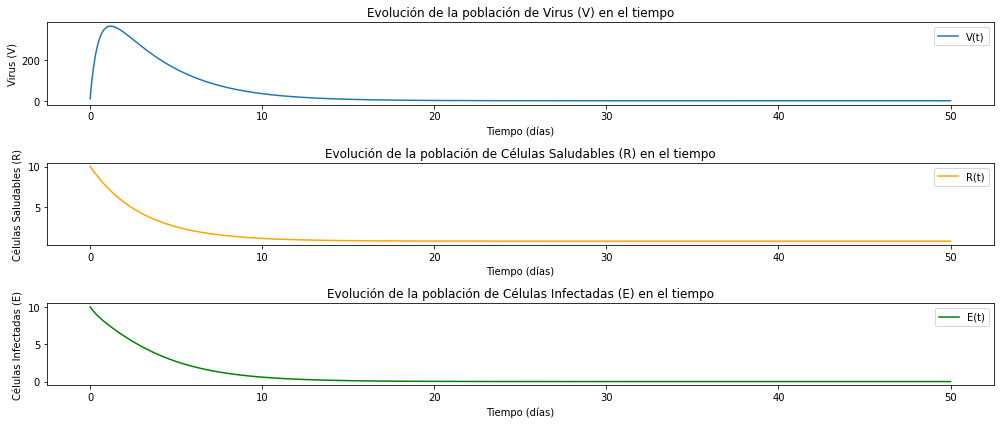

In [50]:
# Graficar los resultados
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(sol.t, sol.y[0], label='V(t)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Virus (V)')
plt.title("Evolución de la población de Virus (V) en el tiempo")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sol.t, sol.y[1], label='R(t)', color='orange')
plt.xlabel('Tiempo (días)')
plt.ylabel('Células Saludables (R)')
plt.title("Evolución de la población de Células Saludables (R) en el tiempo")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sol.t, sol.y[2], label='E(t)', color='green')
plt.xlabel('Tiempo (días)')
plt.ylabel('Células Infectadas (E)')
plt.title("Evolución de la población de Células Infectadas (E) en el tiempo")
plt.legend()

plt.tight_layout()
plt.show()


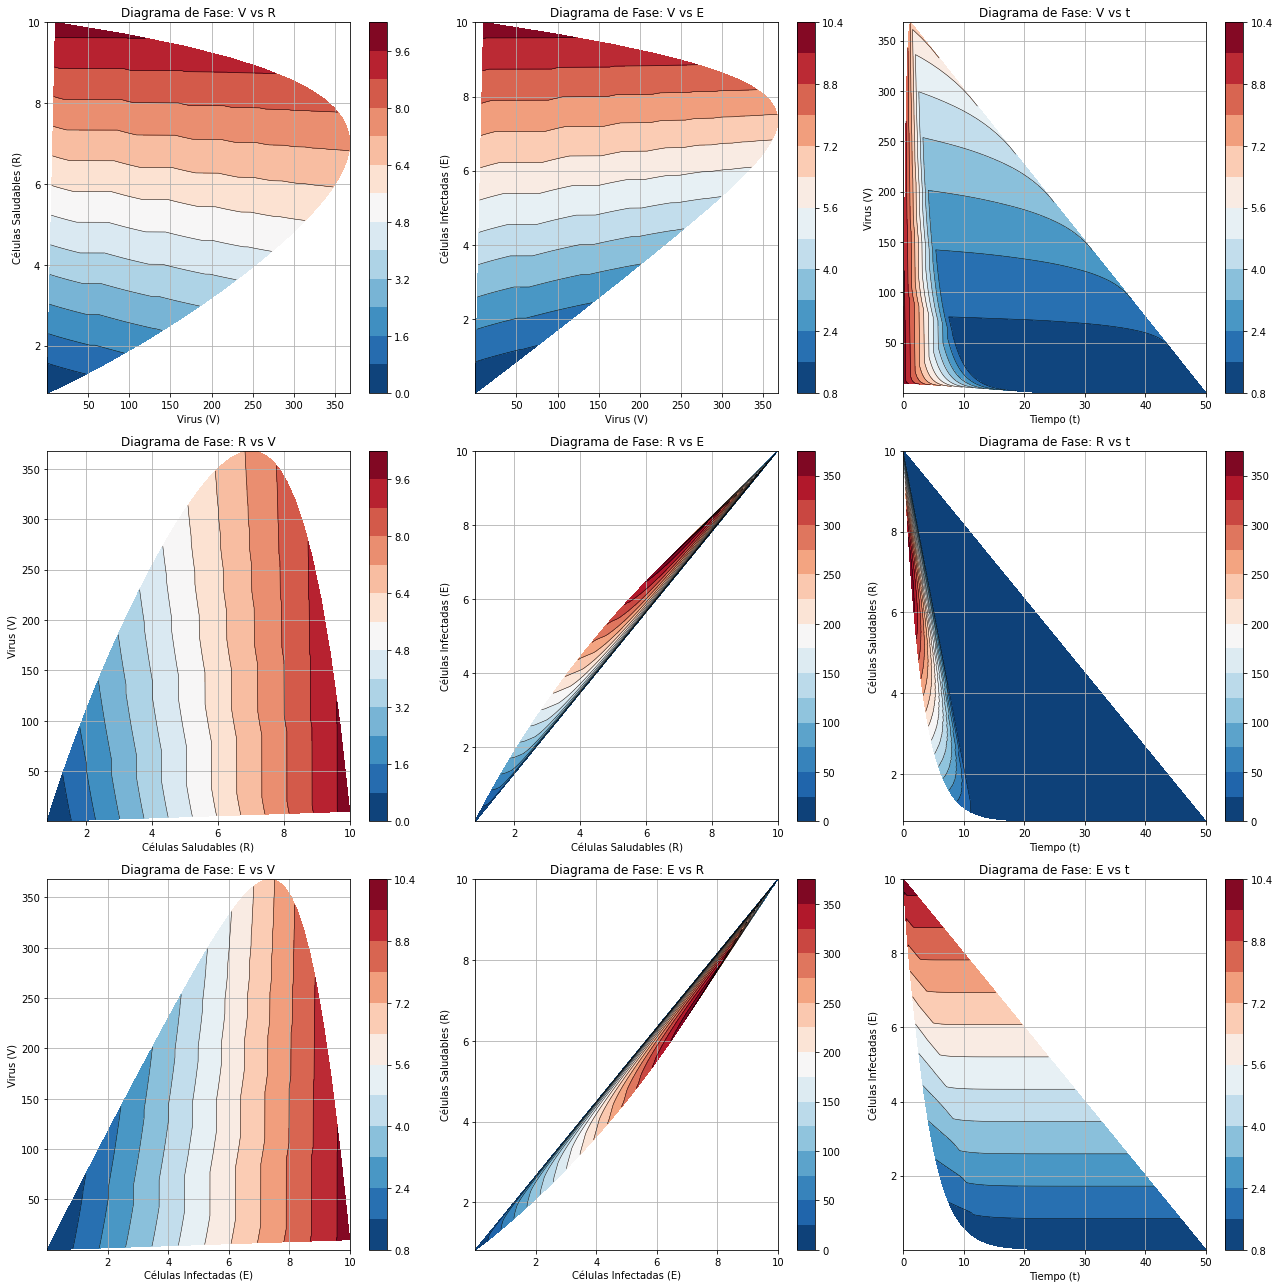

In [39]:
# Extraer los resultados
V = sol.y[0]
R = sol.y[1]
E = sol.y[2]

# Graficar los diagramas de fase con contornos
plt.figure(figsize=(18, 18))

# Diagrama de fase V vs R
plt.subplot(3, 3, 1)
plt.tricontour(V, R, E, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(V, R, E, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Virus (V)')
plt.ylabel('Células Saludables (R)')
plt.title('Diagrama de Fase: V vs R')
plt.grid(True)

# Diagrama de fase V vs E
plt.subplot(3, 3, 2)
plt.tricontour(V, E, R, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(V, E, R, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Virus (V)')
plt.ylabel('Células Infectadas (E)')
plt.title('Diagrama de Fase: V vs E')
plt.grid(True)

# Diagrama de fase V vs t
plt.subplot(3, 3, 3)
plt.tricontour(sol.t, V, R, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(sol.t, V, R, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Tiempo (t)')
plt.ylabel('Virus (V)')
plt.title('Diagrama de Fase: V vs t')
plt.grid(True)

# Diagrama de fase R vs V
plt.subplot(3, 3, 4)
plt.tricontour(R, V, E, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(R, V, E, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Células Saludables (R)')
plt.ylabel('Virus (V)')
plt.title('Diagrama de Fase: R vs V')
plt.grid(True)

# Diagrama de fase R vs E
plt.subplot(3, 3, 5)
plt.tricontour(R, E, V, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(R, E, V, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Células Saludables (R)')
plt.ylabel('Células Infectadas (E)')
plt.title('Diagrama de Fase: R vs E')
plt.grid(True)

# Diagrama de fase R vs t
plt.subplot(3, 3, 6)
plt.tricontour(sol.t, R, V, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(sol.t, R, V, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Tiempo (t)')
plt.ylabel('Células Saludables (R)')
plt.title('Diagrama de Fase: R vs t')
plt.grid(True)

# Diagrama de fase E vs V
plt.subplot(3, 3, 7)
plt.tricontour(E, V, R, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(E, V, R, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Células Infectadas (E)')
plt.ylabel('Virus (V)')
plt.title('Diagrama de Fase: E vs V')
plt.grid(True)

# Diagrama de fase E vs R
plt.subplot(3, 3, 8)
plt.tricontour(E, R, V, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(E, R, V, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Células Infectadas (E)')
plt.ylabel('Células Saludables (R)')
plt.title('Diagrama de Fase: E vs R')
plt.grid(True)

# Diagrama de fase E vs t
plt.subplot(3, 3, 9)
plt.tricontour(sol.t, E, R, levels=14, linewidths=0.5, colors='k')
contour = plt.tricontourf(sol.t, E, R, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.xlabel('Tiempo (t)')
plt.ylabel('Células Infectadas (E)')
plt.title('Diagrama de Fase: E vs t')
plt.grid(True)

plt.tight_layout()
plt.show()


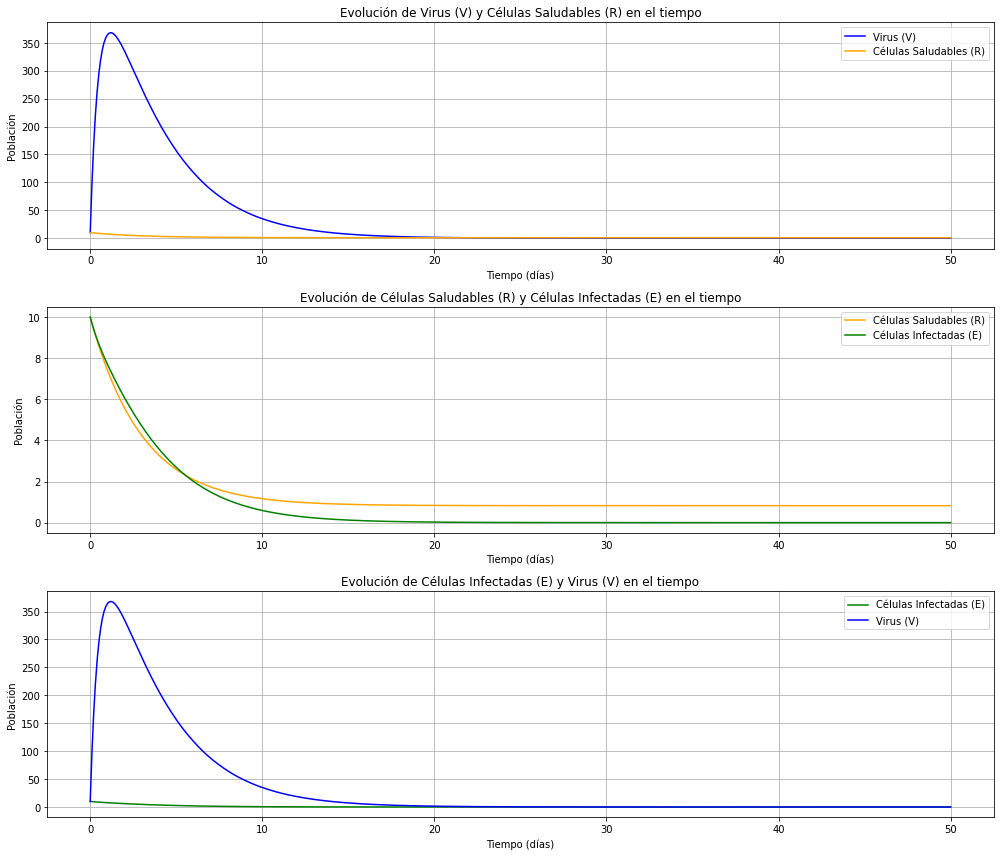

In [44]:
# Graficar las combinaciones de dos poblaciones contra el tiempo
combinations = [(V, 'Virus (V)', 'blue'), (R, 'Células Saludables (R)', 'orange'), (E, 'Células Infectadas (E)', 'green')]
comb_labels = [('V', 'R'), ('V', 'E'), ('R', 'E')]

plt.figure(figsize=(14, 12))

for i, ((pop1, label1, color1), (pop2, label2, color2)) in enumerate(zip(combinations, combinations[1:] + combinations[:1])):
    plt.subplot(3, 1, i+1)
    plt.plot(t, pop1, label=label1, color=color1)
    plt.plot(t, pop2, label=label2, color=color2)
    plt.xlabel('Tiempo (días)')
    plt.ylabel('Población')
    plt.title(f'Evolución de {label1} y {label2} en el tiempo')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Relaciones en el modelo del VIH

1. **Cuando el virus aumenta, las células saludables disminuyen:**
   - Esto ocurre debido a la ecuación que describe la tasa de cambio de las células saludables (R). En el modelo, esta ecuación tiene la forma \( \frac{dR}{dt} = \beta_1 - \beta_2 R \), donde \( \beta_1 \) representa la tasa de producción de células saludables y \( \beta_2 \) es la tasa de muerte natural de estas células.
   - Cuando el virus (V) aumenta, la tasa de infección de células saludables también aumenta, lo que conduce a una disminución en la cantidad de células saludables a medida que son infectadas por el virus y mueren debido a la infección.

2. **Cuando las células saludables disminuyen, las células infectadas también disminuyen:**
   - Esto se debe a la ecuación que describe la tasa de cambio de las células infectadas (E) en el modelo, que tiene la forma \( \frac{dE}{dt} = \gamma R V - \beta_2 E \), donde \( \gamma \) es la tasa de infección de células saludables por el virus.
   - Cuando las células saludables (R) disminuyen, la disponibilidad de células susceptibles a la infección por el virus disminuye. Por lo tanto, la tasa de infección de células saludables también disminuye, lo que lleva a una disminución en la cantidad de células infectadas (E).

3. **Cuando el virus aumenta, las células infectadas disminuyen:**
   - Esto se refiere a la dinámica del modelo en la que las células infectadas (E) dependen tanto de la infección de células saludables como de la eliminación por el sistema inmune. La ecuación \( \frac{dE}{dt} = \gamma R V - \beta_2 E \) muestra cómo la tasa de infección de células saludables por el virus (primer término) afecta el crecimiento de las células infectadas.
   - A medida que el virus (V) aumenta, también lo hace la tasa de infección de células saludables (γRV). Sin embargo, este aumento en la tasa de infección puede verse contrarrestado por otros factores, como la tasa de eliminación de células infectadas (β2E), lo que podría resultar en una disminución en la cantidad de células infectadas.

Estas relaciones son características del modelo utilizado para simular la dinámica de infección por VIH y reflejan cómo las diferentes poblaciones interactúan entre sí y cómo estas interacciones afectan sus respectivas tasas de cambio a lo largo del tiempo.
